

<center> <h1>TRABAJO DE INVESTIGACIÓN I</h1> </center> 

<center> <h1>WEB SCRAPPING</h1> </center> 

<center> <h1>INTRODUCCIÓN.<center> <h1>


El web scraping o minería de datos es el acto de recopilar grandes volúmenes de información de Internet y almacenarla en bases de datos para su posterior análisis y uso. El web scraping proporciona información sobre precios, dinámica del mercado, tendencias actuales, actividades de la competencia y problemas de confrontación. Si comprendes cómo obtenerlo, esta información está disponible. El hecho es que varios especialistas en marketing desconocen los beneficios del web scraping, y por ende desconocen que este es una técnica comercial muy eficaz para las tiendas de Internet.



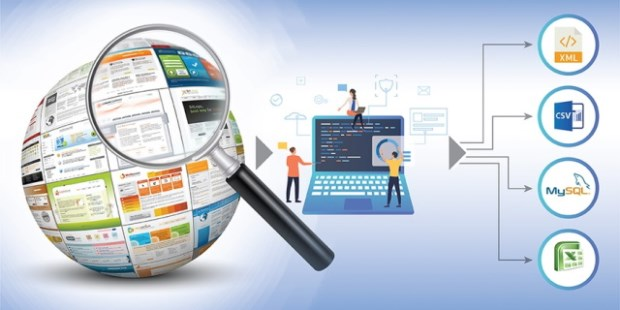



Dentro del scraping hay diferentes modos de funcionamiento, aunque en general se diferencia entre el scraping automático y el manual. El scraping manual define el copiado y pegado manual de información y datos, como quien recorta y guarda artículos de periódico y solo se lleva a cabo si se desea encontrar y almacenar alguna información concreta. Es un proceso muy laborioso que raras veces se aplica a grandes cantidades de datos.

En el caso del scraping automático, se recurre a un software o un algoritmo que analiza diferentes páginas web para extraer información. Se utiliza software especializado según el tipo de página web y el contenido. 


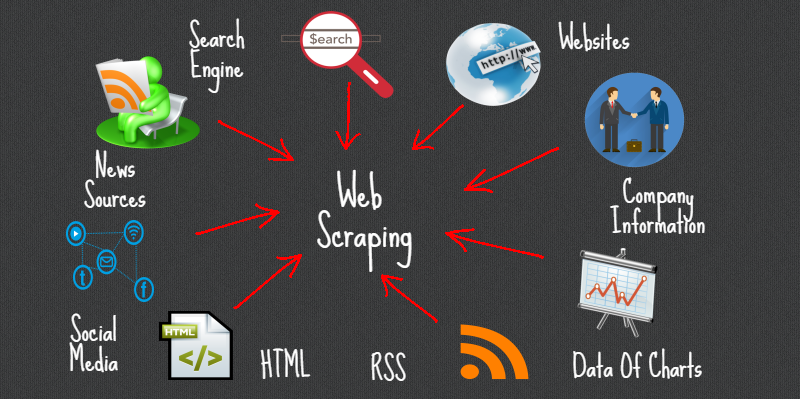

### El proceso de web scraping consta principalmente de 3 partes:

- Analizar a través de un sitio web HTML
- Extraer los datos necesarios.
- Almacenar los datos

¿Cuáles son las ventajas del web scraping?
- La extracción de datos es automatizada.

- Rapidez.

- La información recopilada es mucho más precisa.

- Es un método rentable (a veces incluso gratuito).

- Obtener datos limpios y estructurados con web scraping.


## - Herramientas de scraping para Python

La mayoría de los scrapers están escritos en python para facilitar procesamiento posterior a la recolección de datos extraídos de la web. Algunos de los scrapers se realizan usando marcos y librerías para el rastreo web:

### Request:
Esta librería permite realizar peticiones a los sitios web desde python. Se suele utilizar junto con Beautiful Soup ya que ésta sólo permite buscar en el HTML las etiquetas que necesitamos.

###  Beautiful Soup: 
Es una librería python que permite extraer información de contenido en formato HTML o XML. Esta librería suele funcionar correctamente en la mayoría de páginas aunque suele tener problemas en páginas que contengan AJAX o Javascript.

### Scrapy: 
Es un framework para scraping, además de las herramientas de scraping, se puede exportar la data recopilada en varios formatos, como JSON o CSV, y almacenar los datos en un backend de su elección. También, tiene una serie de extensiones integradas para tareas como el manejo de cookies, suplantación de user-agent, restricción de la profundidad del rastreo, entre otras, así como un API para ampliar fácilmente las funcionalidades.

###  Selenium: 
La librería Selenium nos permite automatizar navegadores web. Es una herramienta bastante potente que nos permite utilizar un navegador web como si fuese un humano y, posteriormente, se puede utilizar desde python para extraer la información.

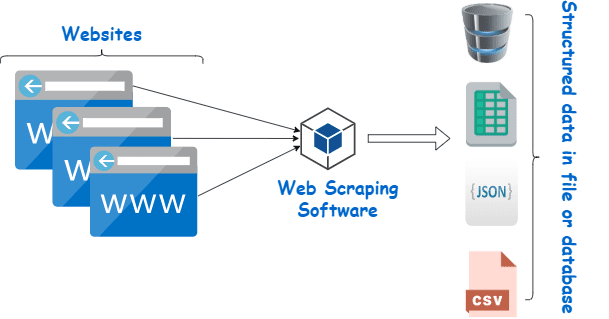

### - El proceso de web scraping

Recopilar las URL de las páginas de las que desea extraer datos. -> Realizar una solicitud a estas URL para obtener el HTML de la página. -> Utilizar localizadores para encontrar los datos en el HTML. -> Guardar los datos en un archivo JSON o CSV o en algún otro formato estructurado.

<center> <h1>PARTE EXPERIMENTAL<center> <h1>

## BCRP

In [1]:
# pip install selenium

# Librerías
import pandas as pd
from qgrid import show_grid
import seaborn as sb
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import warnings

warnings.filterwarnings("ignore", category=Warning)

In [2]:
#/home/mirian/Documentos/investigacion-1/INVESTIGACIÓN/CDR/chromedriver
website_1="https://estadisticas.bcrp.gob.pe/estadisticas/series/index"
path="/home/mirian/Documentos/investigacion-1/INVESTIGACIÓN/CDR/chromedriver"

In [3]:
driver=webdriver.Chrome(path)
driver.get(website_1)            #Que vaya al sitio web

In [4]:
#busque y haga click en boton de "Precios y tarifas"
pre_boton= driver.find_element(By.XPATH,'/html/body/div[3]/div/table/tbody/tr/td[2]/a[11]/u')
pre_boton.click()

# Busque y haga click para ver las series
series_boton= driver.find_element(By.XPATH,'//*[@id="frmMensual"]/div[2]/h2/a')
series_boton.click()

#Busque y haga click para seleccionar todas las series
all_boton= driver.find_element(By.ID,'idSerie0_all')
all_boton.click()

#Cambiar el rango de tiempo, desde 2012 hasta 2022, con select 
lista= Select(driver.find_element(By.ID,'anio1'))
lista.select_by_visible_text("2012")

# Buscar y hacer click en boton para ver la tabla
tabla_boton= driver.find_element(By.ID,'btnBuscar')
tabla_boton.click()

# Guardar todos los datos que estén dentro del tag tr
datos=driver.find_elements(By.TAG_NAME,"tr")

#Agregar cada dato a la variable data
data=[]
for dato in datos:
    data.append(dato.text)
    
driver.quit()         #Cerrar webdriver
df_bcr=pd.DataFrame({"data":data})      #Crear dataframe 

In [5]:
df_bcr.to_csv("precios_tarifas.csv",index=False) #Guardar en csv

In [6]:
x=pd.read_csv("precios_tarifas.csv",header=2,sep=" ")  #Leer desde la segunda linea
x

,Fecha,Índices,reales,de,precios,de.1,combustibles,y,de.2,tarifas,...,públicos.11,(2010.11,=.11,100).11,-.22,Tarifas.3,Telefónicas,-.23,Servicio,Local
0,Jul12,111,113.0,108.0,108.0,97.0,115.0,97.0,86.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ago12,110,112.0,109.0,110.0,98.0,115.0,94.0,86.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sep12,113,115.0,114.0,114.0,97.0,117.0,93.0,85.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oct12,113,115.0,113.0,114.0,97.0,117.0,93.0,86.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nov12,109,109.0,106.0,107.0,98.0,117.0,98.0,91.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Feb22,n.d.,106.0,93.0,92.0,123.0,109.0,121.0,79.0,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Mar22,n.d.,117.0,102.0,102.0,123.0,112.0,124.0,77.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Abr22,n.d.,114.0,104.0,104.0,120.0,102.0,120.0,77.0,133.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,May22,n.d.,119.0,111.0,111.0,118.0,105.0,112.0,76.0,133.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Ver solo las primeras 12 columnas porque los nombres de las columnas del BCR son muy largas
df_bcr=x.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]    

In [8]:
df_bcr     #Obtuvimos los datos pero debemos de cambiar los nombres de las columnas

,Fecha,Índices,reales,de,precios,de.1,combustibles,y,de.2,tarifas,de.3,servicios,públicos
0,Jul12,111,113.0,108.0,108.0,97.0,115.0,97.0,86.0,100.0,103.0,109.0,82.0
1,Ago12,110,112.0,109.0,110.0,98.0,115.0,94.0,86.0,101.0,105.0,110.0,82.0
2,Sep12,113,115.0,114.0,114.0,97.0,117.0,93.0,85.0,100.0,104.0,109.0,80.0
3,Oct12,113,115.0,113.0,114.0,97.0,117.0,93.0,86.0,100.0,105.0,109.0,79.0
4,Nov12,109,109.0,106.0,107.0,98.0,117.0,98.0,91.0,101.0,105.0,110.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Feb22,n.d.,106.0,93.0,92.0,123.0,109.0,121.0,79.0,136.0,161.0,121.0,47.0
116,Mar22,n.d.,117.0,102.0,102.0,123.0,112.0,124.0,77.0,134.0,159.0,119.0,46.0
117,Abr22,n.d.,114.0,104.0,104.0,120.0,102.0,120.0,77.0,133.0,157.0,118.0,46.0
118,May22,n.d.,119.0,111.0,111.0,118.0,105.0,112.0,76.0,133.0,160.0,118.0,46.0


In [9]:
df_bcr.columns

Index(['Fecha', 'Índices', 'reales', 'de', 'precios', 'de.1', 'combustibles',
       'y', 'de.2', 'tarifas', 'de.3', 'servicios', 'públicos'],
      dtype='object')

In [10]:
df_bcr.columns=['Fecha', 'Índices','reales', 'de', 'precios', 'de.1', 'combustibles',
       'y', 'de.2', 'tarifas', 'de.3','servicios', 'públicos']

In [11]:
df_bcr.rename(columns={'Índices':"gasohol_84",'reales':"gasohol_90", 'de':"gasohol_95", 'precios':"gasohol_97", 'de.1':"Gas_Domestico", 'combustibles':"Petroleo_Diesel",
       'y':"GLP_Veicular", 'de.2':"Combustibles_GNV", 'tarifas':"Tarifa_Electrica_Residencial", 'de.3':"Trafica_Electrica_Industrial",'servicios':"T.Agua_Domestica", 'públicos':"T.Telefonicas_Locales"},
         inplace=True) #Reemplazamos las columnas con los nombres Simplificados 

In [12]:
df_bcr.columns

Index(['Fecha', 'gasohol_84', 'gasohol_90', 'gasohol_95', 'gasohol_97',
       'Gas_Domestico', 'Petroleo_Diesel', 'GLP_Veicular', 'Combustibles_GNV',
       'Tarifa_Electrica_Residencial', 'Trafica_Electrica_Industrial',
       'T.Agua_Domestica', 'T.Telefonicas_Locales'],
      dtype='object')

In [13]:
df_bcr

,Fecha,gasohol_84,gasohol_90,gasohol_95,gasohol_97,Gas_Domestico,Petroleo_Diesel,GLP_Veicular,Combustibles_GNV,Tarifa_Electrica_Residencial,Trafica_Electrica_Industrial,T.Agua_Domestica,T.Telefonicas_Locales
0,Jul12,111,113.0,108.0,108.0,97.0,115.0,97.0,86.0,100.0,103.0,109.0,82.0
1,Ago12,110,112.0,109.0,110.0,98.0,115.0,94.0,86.0,101.0,105.0,110.0,82.0
2,Sep12,113,115.0,114.0,114.0,97.0,117.0,93.0,85.0,100.0,104.0,109.0,80.0
3,Oct12,113,115.0,113.0,114.0,97.0,117.0,93.0,86.0,100.0,105.0,109.0,79.0
4,Nov12,109,109.0,106.0,107.0,98.0,117.0,98.0,91.0,101.0,105.0,110.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Feb22,n.d.,106.0,93.0,92.0,123.0,109.0,121.0,79.0,136.0,161.0,121.0,47.0
116,Mar22,n.d.,117.0,102.0,102.0,123.0,112.0,124.0,77.0,134.0,159.0,119.0,46.0
117,Abr22,n.d.,114.0,104.0,104.0,120.0,102.0,120.0,77.0,133.0,157.0,118.0,46.0
118,May22,n.d.,119.0,111.0,111.0,118.0,105.0,112.0,76.0,133.0,160.0,118.0,46.0


In [14]:
show_grid(df_bcr)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## EBAY - SAMSUNG

In [15]:
# pip install selenium
# pip install bs4
# Librerías
from qgrid import show_grid
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [18]:
website_2="https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2334524.m570.l1313&_nkw=samsung&_sacat=9355&LH_TitleDesc=0&_odkw=iphone&_osacat=9355"
path="/home/mirian/Documentos/investigacion-1/INVESTIGACIÓN/CDR/chromedriver"

In [20]:
driver=webdriver.Chrome(path)     
driver.get(website_2)     #Que vaya al sitio web 

page=BeautifulSoup(driver.page_source,"html.parser")         #Guarda todo el html en la variable page

nombres=[]
precios=[]         #Listas para guardar los datos 
estados=[]
ubicaciones=[]
vendedores=[]
estrellas=[]
valoraciones=[]

# For para que encuentre elemento por elemento que queremos y de ahi obtenga cada informacion
# Como el nombre, precio , etc
# Este For se repetirá para cada elemento que encuentre

for samsung in page.findAll("li",attrs={"class":"s-item s-item__pl-on-bottom","data-view":True}):
    nombre=samsung.find("h3",attrs={"class":"s-item__title"})
    if nombre:
        nombres.append(nombre.text)               #Añadimos nombres
    else:
        x="-"
        nombres.append(x)
        
    precio=samsung.find("span",attrs={"class":"s-item__price"})
    if precio:
        precios.append(precio.text)                  #Añadimos precios
    else:
        x="-"
        precios.append(x)
        
    estado=samsung.find("span",attrs={"class":"SECONDARY_INFO"})
    if estado:
        estados.append(estado.text)                   #Añadimos estados
    else:
        x="-"
        estados.append(x)

    ubicacion=samsung.find("span",attrs={"class":"s-item__location s-item__itemLocation"})
    if ubicacion:
        ubicaciones.append(ubicacion.text)                   #Añadimos ubicaciones
    else:
        x="-"
        ubicaciones.append(x)
        
    vendedor=samsung.find("span",attrs={"class":"s-item__etrs-text"})
    if vendedor:
        vendedores.append(vendedor.text)                   #Añadimos calificacion de vendedores
    else:
        x="-"
        vendedores.append(x)
        
    stars=samsung.find("div",attrs={"class":"x-star-rating"})
    if stars:
        estrellas.append(stars.text)                   #Añadimos cantidad de estrellas
    else:
        x="-"
        estrellas.append(x)
        
    val=samsung.find("span",attrs={"class":"s-item__reviews-count"})
    if val:
        valoraciones.append(val.text)                   #Añadimos cantidad de valoraciones
    else:
        x="-"
        valoraciones.append(x)


driver.quit()            #Cerramos  Webdriver

#Creamos un diccionario en donde irán cada lista con el nombre que queremos de columna
data={"Nombres":nombres,"Precios":precios,"Estado":estados,"Ubicación":ubicaciones,
      "Calificacion_vendedor":vendedores,"Estrellas":estrellas,"Valoraciones":valoraciones}

df_ebay=pd.DataFrame(data)     #Creamos dataframe

df_ebay.to_csv("Samsung_ebay.csv") #Guardar en csv

show_grid(df_ebay)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

<center> <h1>CONCLUSIÓN.<center> <h1>



El Web Scraping permite obtener gran cantidad de información de una manera automática de diferentes sitios web; gracias a esto, podemos crear bases de datos aprovechables, las cuales tienen una infinidad de maneras de ser aplicadas. Se puede mencionar que a diferencia del proceso de extraer datos manualmente, el web scraping utiliza la automatización inteligente para recuperar cientos, millones o incluso miles de millones de puntos de datos sumergidos en Internet.

Para hacer el presente proyecto de web scraping hemos utilizado las librerías: selenium y beautifulsoup ,las cuales nos han permitido acceder a los datos de la pagina web que escogimos y localizar o seleccionar ciertos elementos, así mismo hemos utilizado Chrome driver  el cual es un ejecutable separado que selenium webdriver  usa para navegar y controlar Chrome. Selenium es una herrienta muy importante que nos ayudó a realizar el web scrappping como principiantes y una buena opción si la prioridad es extraer datas o contenidos dinámicos con Python. BeautifulSoup es una herramienta muy inportante si es que se necesita un desarrollo rápido y para a su vez familiarizarse con los conceptos de Python y de web scraping.
    
En resumen, en ambos informes hemos seleccionado datos , los cual han sido obtenidos  siguiendo una ruta especifica, y gracias a ello se a podido ubicarlos y almacenarlos en variables usando un bucle for , y ello se almaceno dentro de un dataframe .de aquí ,apartir de estos datos sacados de una pagina web , se puede realizar cualquier tipo de análisis y estadística.

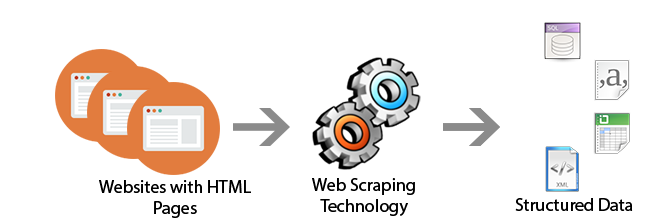




### BIBLIOGRAFÍA 


- Como obtener información de una página web usando Web Scraping: https://www.youtube.com/watch?v=mbjZNTjHh0Y&t=462s 

- Importancia del Web Scraping en el Comercio Electrónico: https://www.octoparse.es/blog/importancia-del-web-scraping-en-ecommerce#

- Web scraping: https://www.ionos.es/digitalguide/paginas-web/desarrollo-web/que-es-el-web-scraping/

- Importancia del web scraping: https://www.octoparse.es/blog/por-que-web-scraping-es-importante

- Web scraping con Python: introducción y tutorial: https://www.ionos.es/digitalguide/paginas-web/desarrollo-web/web-scraping-con-python/

- Descubre qué es el Web Scraping y cuáles son sus ventajas: https://aml.stradata.co/2020/09/23/descubre-que-es-el-web-scraping-y-cuales-son-sus-ventajas/#:~:text=Conclusiones,de%20maneras%20de%20ser%20aplicadas.

- Qué es el web scrapping y cómo se utiliza en los negocios: https://www.iebschool.com/blog/que-es-el-web-scrapping-y-como-se-utiliza-en-los-negocios-digital-business/